###  import some important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


## Load The data

In [2]:
movies = pd.read_csv(r'C:\Users\Yash Kumar\Documents\Movies Recommendation System\movies.csv')
ratings = pd.read_csv(r'C:\Users\Yash Kumar\Documents\Movies Recommendation System\ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


### Check the descriptive status of the function

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [7]:
movies.shape

(10329, 3)

In [8]:
ratings.shape

(105339, 4)

In [9]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [11]:
genres = []
for genre in movies.genres:
    x = genre.split('|')
    for i in x:
        if i not in genres:
            genres.append(str(i))
genres = str(genres)
print(genres)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']


In [12]:
movie_title = []
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title = str(movie_title)



### Data Visualisation

In [13]:
wordcloud_genre = WordCloud(width = 1500, height = 800, background_color = 'cyan', min_font_size = 2,min_word_length = 3).generate(genres)
wordcloud_title = WordCloud(width = 1500, height = 800, background_color = 'red', min_font_size = 2, min_word_length =3).generate(genres)

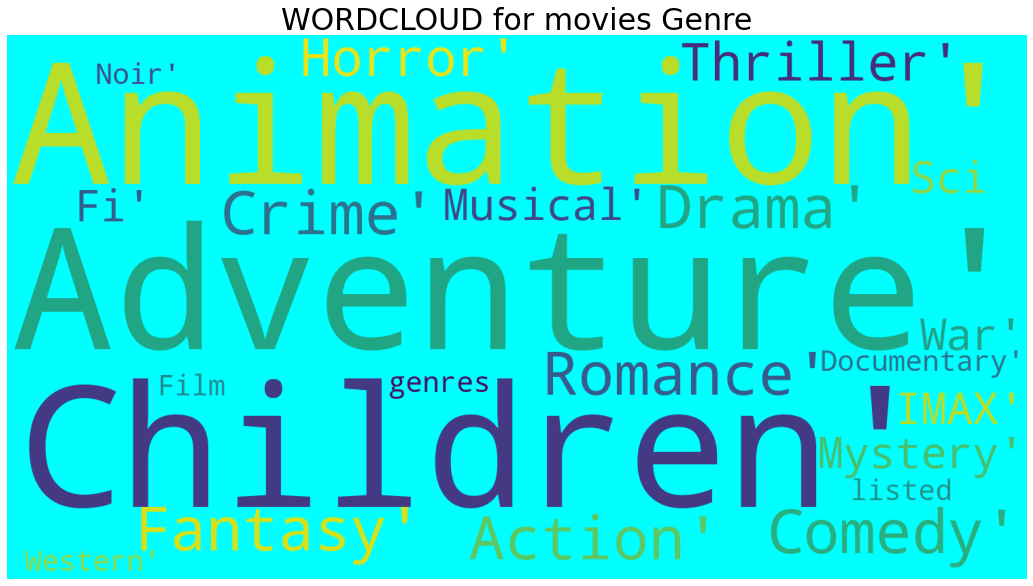

In [14]:
plt.figure(figsize = (30,10))
plt.axis('off')
plt.title('WORDCLOUD for movies Genre', fontsize = 30)
plt.imshow(wordcloud_genre)

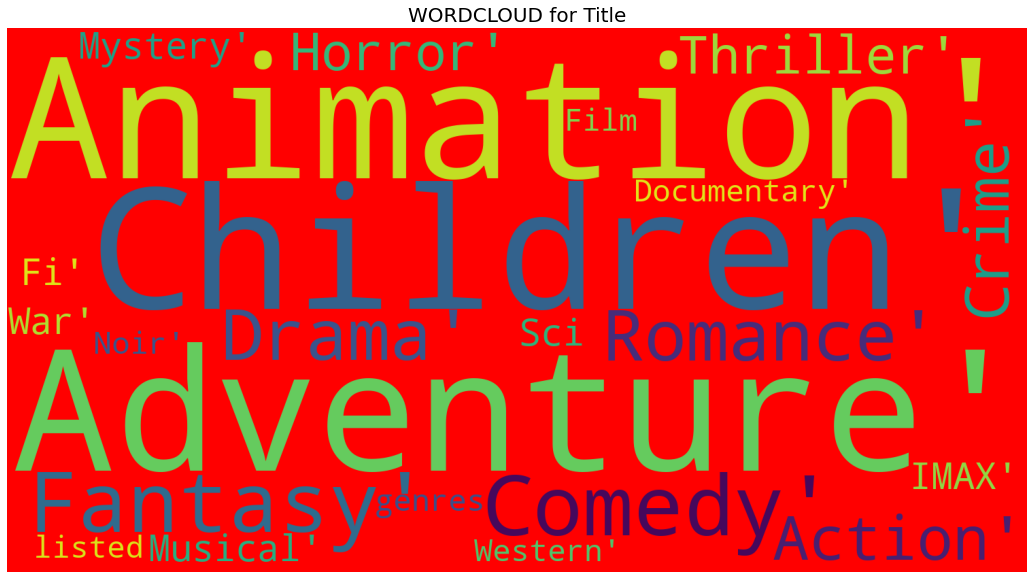

In [15]:
plt.figure(figsize = (30,10))
plt.axis('off')
plt.title('WORDCLOUD for Title',fontsize = 20)
plt.imshow(wordcloud_title)

In [16]:
df = pd.merge(ratings, movies, how = 'left',on = 'movieId')
df.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,110,4.0,1217896150,Braveheart (1995),Action|Drama|War
6,1,150,3.0,1217895940,Apollo 13 (1995),Adventure|Drama|IMAX
7,1,161,4.0,1217897864,Crimson Tide (1995),Drama|Thriller|War
8,1,165,3.0,1217897135,Die Hard: With a Vengeance (1995),Action|Crime|Thriller
9,1,204,0.5,1217895786,Under Siege 2: Dark Territory (1995),Action


In [17]:
df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [18]:
df1 = df.groupby(['title'])[['rating']].sum()
high_rated = df1.nlargest(25, 'rating')
high_rated.head(10)

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


<BarContainer object of 25 artists>

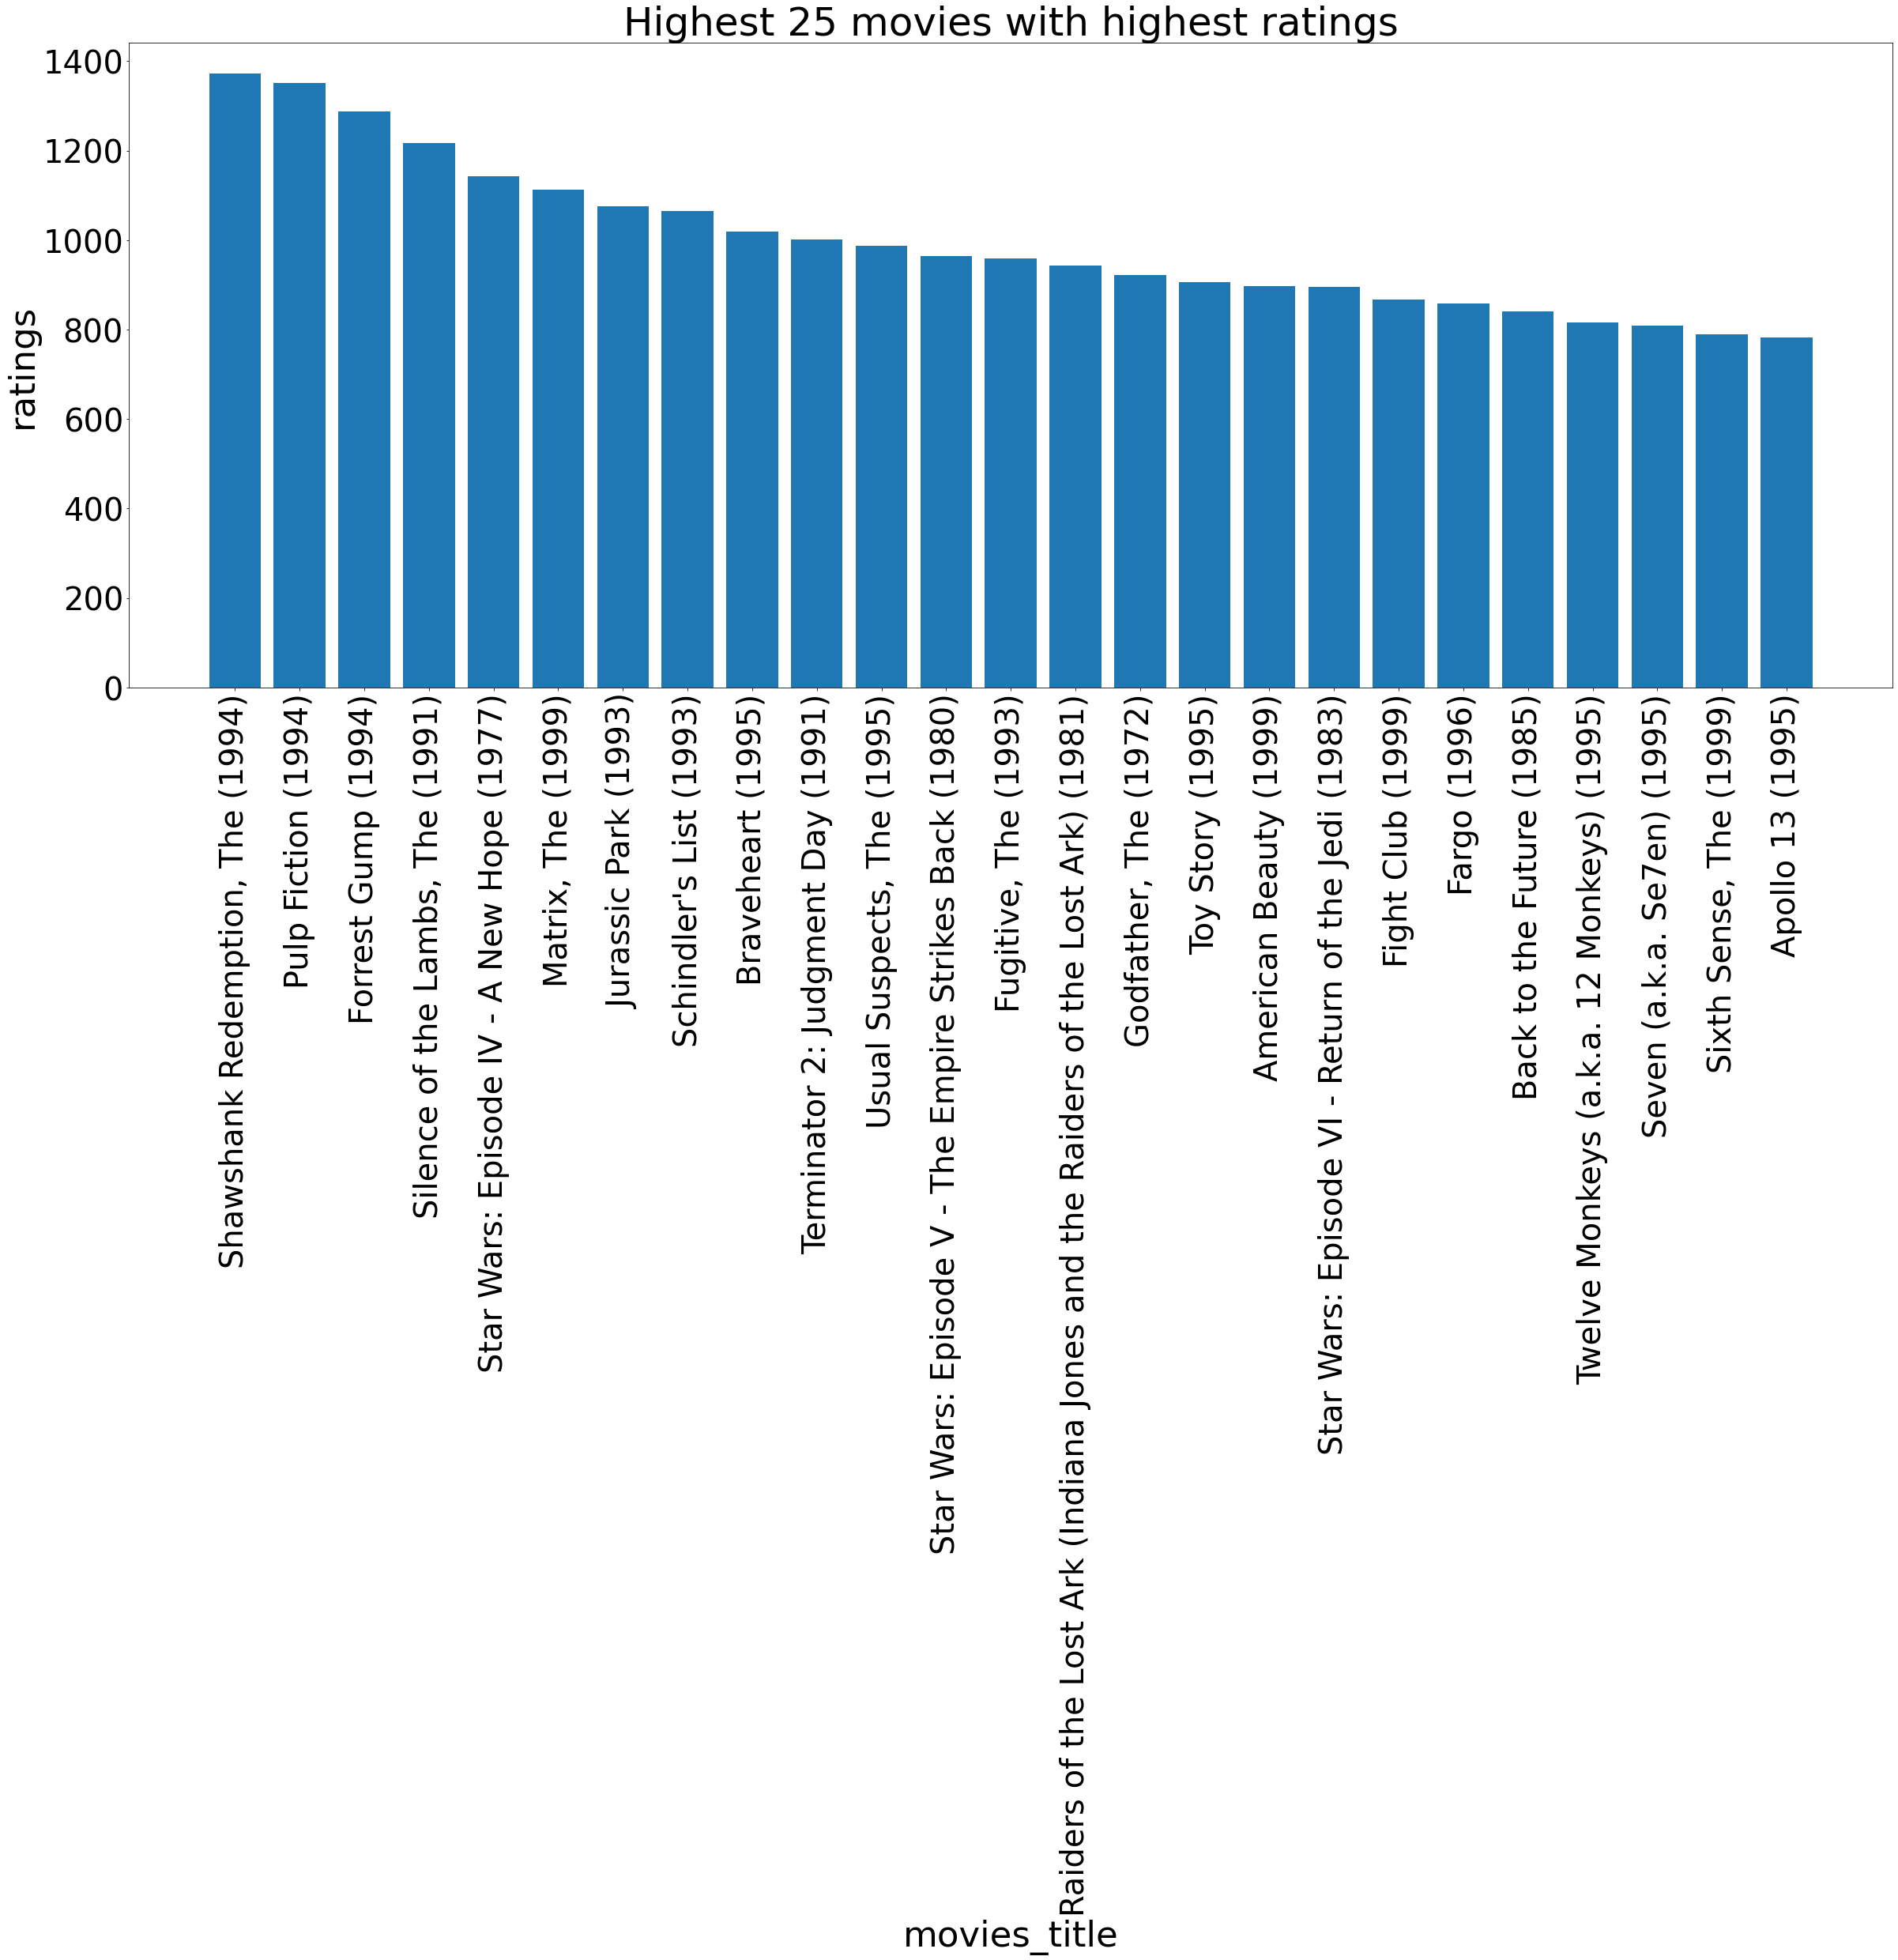

In [19]:
plt.figure(figsize = (40,15))
plt.title('Highest 25 movies with highest ratings', fontsize = 50)
plt.ylabel('ratings', fontsize = 45)
plt.xlabel('movies_title', fontsize = 45)
plt.xticks(fontsize = 40, rotation = 90)
plt.yticks(fontsize = 40)
plt.bar(high_rated.index,high_rated['rating'])

In [20]:
df2 = df.groupby('title')[['rating']].count()
rating_count = df2.nlargest(25,'rating')
rating_count.head(10)

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290
Star Wars: Episode IV - A New Hope (1977),273
"Matrix, The (1999)",261
Terminator 2: Judgment Day (1991),253
Braveheart (1995),248


<BarContainer object of 25 artists>

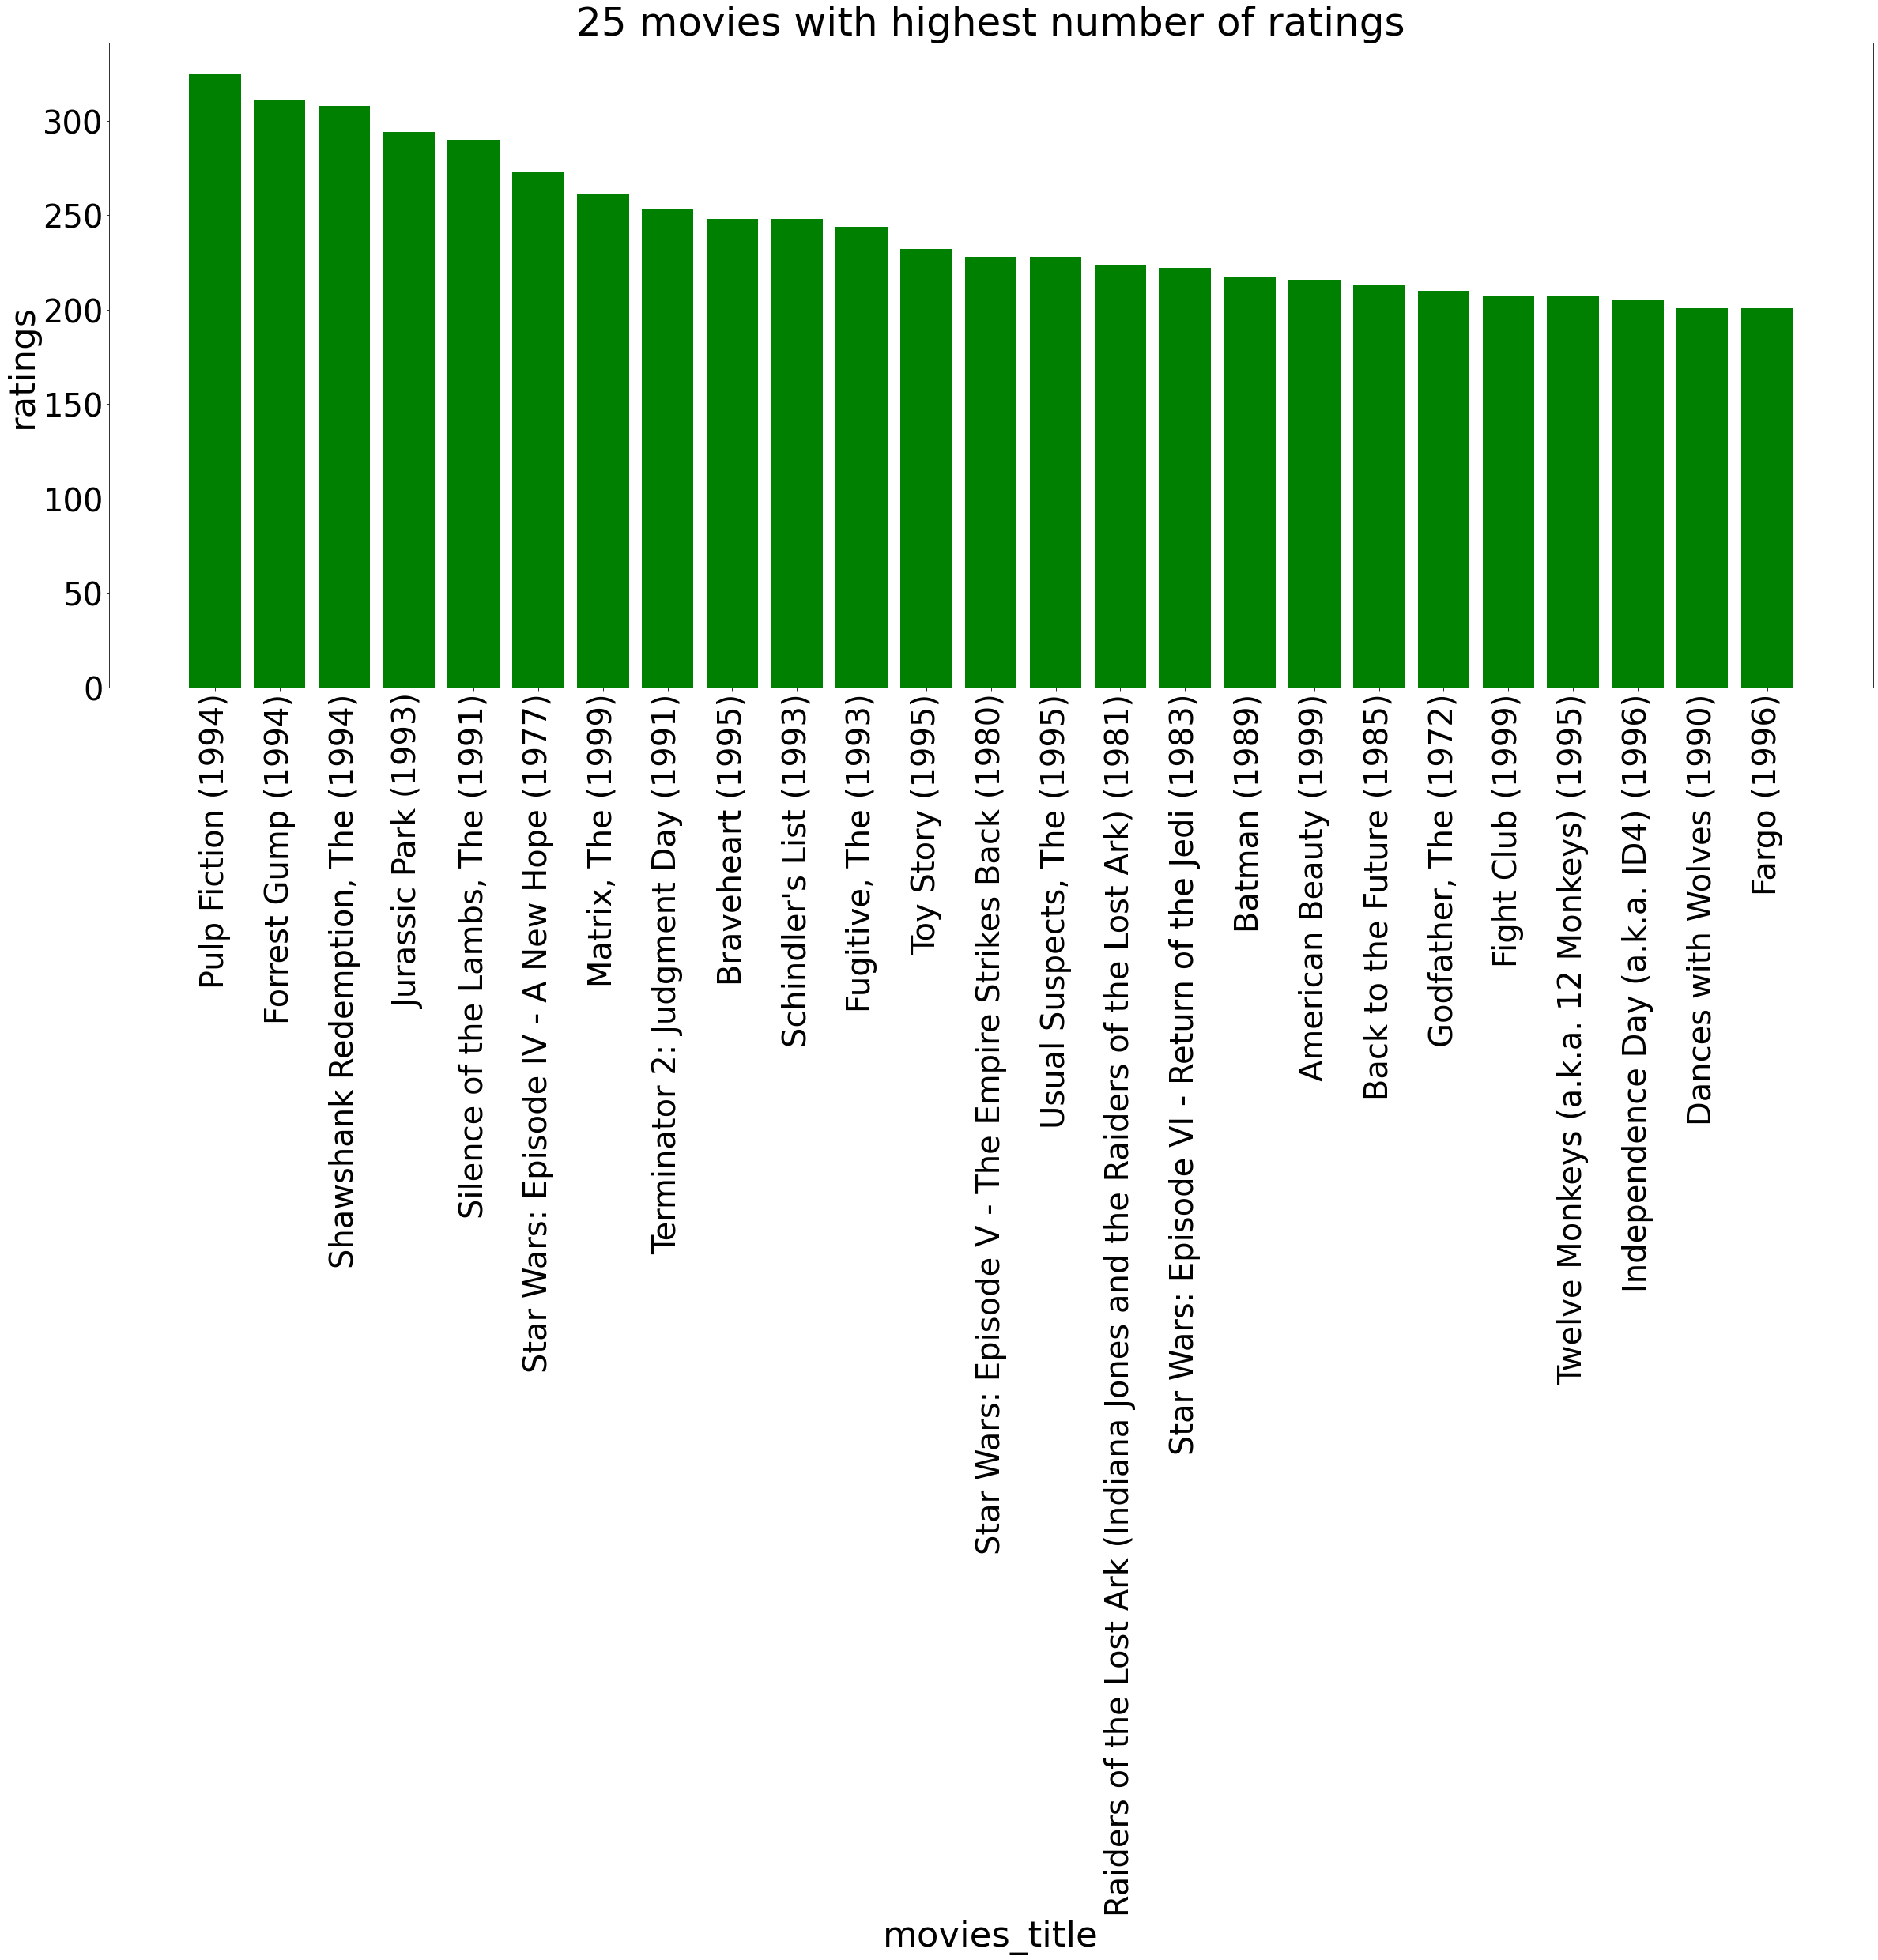

In [21]:
plt.figure(figsize = (40,15))
plt.title('25 movies with highest number of ratings',fontsize = 50)
plt.ylabel('ratings',fontsize = 45)
plt.xlabel('movies_title',fontsize = 45)
plt.xticks(fontsize = 40, rotation = 90)
plt.yticks(fontsize = 40)
plt.bar(rating_count.index, rating_count['rating'],color = 'green')

In [22]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [23]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [25]:
indices = pd.Series(movies.index, index = movies['title'])
titles = movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    sim_scores = sim_scores[1:25]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [26]:
recommendations('Forrest Gump (1994)')

1838           Life Is Beautiful (La Vita è bella) (1997)
2399                  Train of Life (Train de vie) (1998)
4504          Divine Intervention (Yadon ilaheyya) (2002)
7554    I Served the King of England (Obsluhoval jsem ...
5243                              Kiss Them for Me (1957)
6170                            To Be or Not to Be (1983)
348                            Colonel Chabert, Le (1994)
741                             Gone with the Wind (1939)
946                           English Patient, The (1996)
1510                         From Here to Eternity (1953)
1626                                Doctor Zhivago (1965)
2185                                  Barry Lyndon (1975)
2332               Year of Living Dangerously, The (1982)
2498                           Ride with the Devil (1999)
2707               Love Is a Many-Splendored Thing (1955)
3146                                        Malèna (2000)
3297                       I Know Where I'm Going! (1945)
3399          